In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imputing missing values
from sklearn.impute import KNNImputer

from scipy.stats import chi2_contingency

# Feature engineering
from sklearn.preprocessing import StandardScaler

# Model processing and testing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, plot_roc_curve, precision_score, recall_score

# Models

from sklearn.ensemble import RandomForestClassifier

In [305]:
df = pd.read_csv("StrokeDs.csv")

In [306]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,smokes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,smokes,1
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,smokes,1


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 500 non-null    int64  
 1   gender             500 non-null    object 
 2   age                500 non-null    float64
 3   hypertension       500 non-null    int64  
 4   heart_disease      500 non-null    int64  
 5   ever_married       500 non-null    object 
 6   work_type          500 non-null    object 
 7   Residence_type     500 non-null    object 
 8   avg_glucose_level  500 non-null    float64
 9   bmi                455 non-null    float64
 10  smoking_status     500 non-null    object 
 11  stroke             500 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 47.0+ KB


In [308]:
df.shape

(500, 12)

In [309]:
s0 = round(df[df['stroke'] == 0].describe(), 2)
s1 = round(df[df['stroke'] == 1].describe(), 2)

pd.concat([s0, s1], axis = 1, keys = ['No Stroke', 'Stroke'])

No Stroke                                                               \
             id     age hypertension heart_disease avg_glucose_level     bmi   
count    249.00  249.00        249.0        249.00            249.00  244.00   
mean   36333.85   42.46          0.1          0.04            110.16   29.76   
std    21459.12   22.09          0.3          0.21             47.86    8.67   
min      129.00    0.64          0.0          0.00             55.39   13.80   
25%    17608.00   23.00          0.0          0.00             79.03   24.12   
50%    36471.00   43.00          0.0          0.00             94.09   28.10   
75%    54918.00   60.00          0.0          0.00            120.00   35.00   
max    72911.00   82.00          1.0          1.00            251.60   64.80   

                Stroke                                                       \
      stroke        id     age hypertension heart_disease avg_glucose_level   
count  249.0    251.00  251.00       251.00        251.00            251.00   
mean     0.0  37078.09   67.70         0.30          0.25            135.59   
std      0.0  21911.73   12.71         0.46          0.44             63.40   
min      0.0    210.00    1.32         0.00          0.00             56.11   
25%      0.0  17160.50   59.00         0.00          0.00             80.88   
50%      0.0  36338.00   71.00         0.00          0.00            106.74   
75%      0.0  56607.50   78.00         1.00          1.00            199.85   
max      0.0  72918.00   82.00         1.00          1.00            280.00   

                      
          bmi stroke  
count  211.00  251.0  
mean    30.66    1.0  
std      6.52    0.0  
min     16.90    1.0  
25%     26.55    1.0  
50%     29.70    1.0  
75%     33.90    1.0  
max     56.60    1.0

In [310]:
df.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  45
smoking_status        0
stroke                0
dtype: int64

In [311]:
def count_negatives(data):
    neg_count = 0
    for n in data:
        if type(data) == 'int':
            if n < 0:
               neg_count += 1
    return neg_count

count_negatives(df)

0

In [312]:
df_knn = df.copy()
df_knn.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,smokes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,smokes,1
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,smokes,1


In [313]:
impute = KNNImputer(n_neighbors = 5, weights = 'uniform')
df_knn['bmi'] = impute.fit_transform(df_knn[['bmi']])

In [314]:
df_knn.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [315]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,smokes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,smokes,1
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,smokes,1


Text(-0.5, -0.7, 'Color Palette For This Notebook')

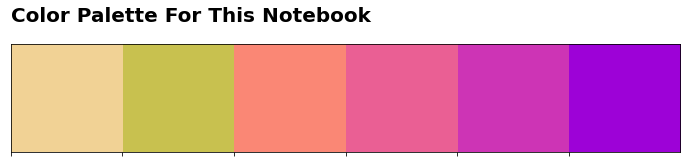

In [316]:
colors = ["#f1d295", "#c8c14f", "#fa8775", "#ea5f94", "#cd34b5", "#9d02d7"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size = 2)
plt.text(-0.5, -0.7, 'Color Palette For This Notebook', size = 20, weight = 'bold')

Text(0, 0.5, 'Count')

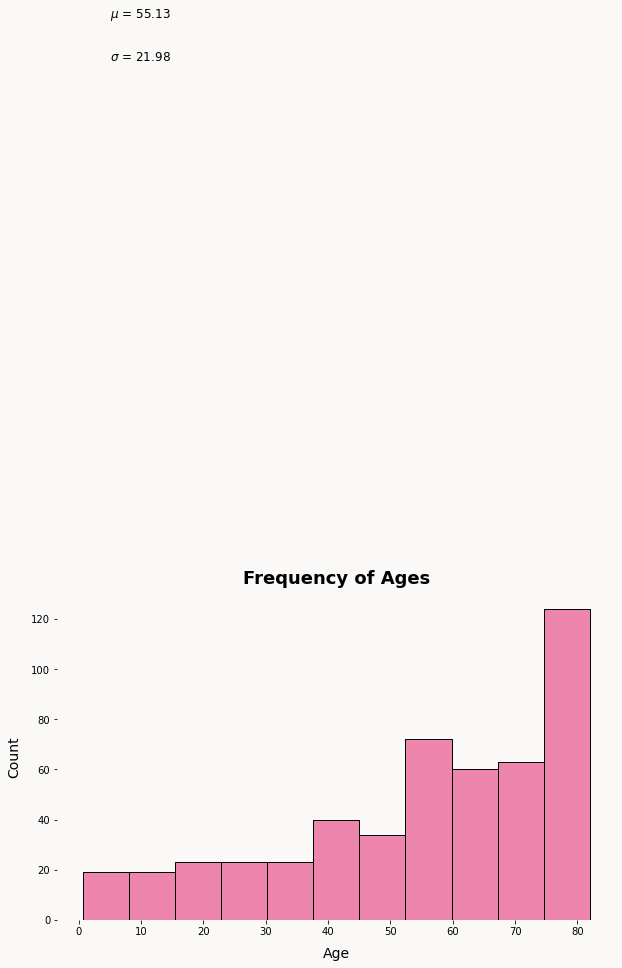

In [317]:
fig, ax = plt.subplots(figsize = (10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['age'],
    kde = False,
    color = "#ea5f94"
)

for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)

plt.text(5, 360, r'$\mu$ = '+str(round(df['age'].mean(), 2)), fontsize = 12)
plt.text(5, 343, r'$\sigma$ = '+str(round(df['age'].std(), 2)), fontsize = 12)
plt.title('Frequency of Ages', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Age', fontsize = 14, labelpad = 10)
plt.ylabel('Count', fontsize = 14, labelpad = 10)

Text(0, 0.5, 'Count')

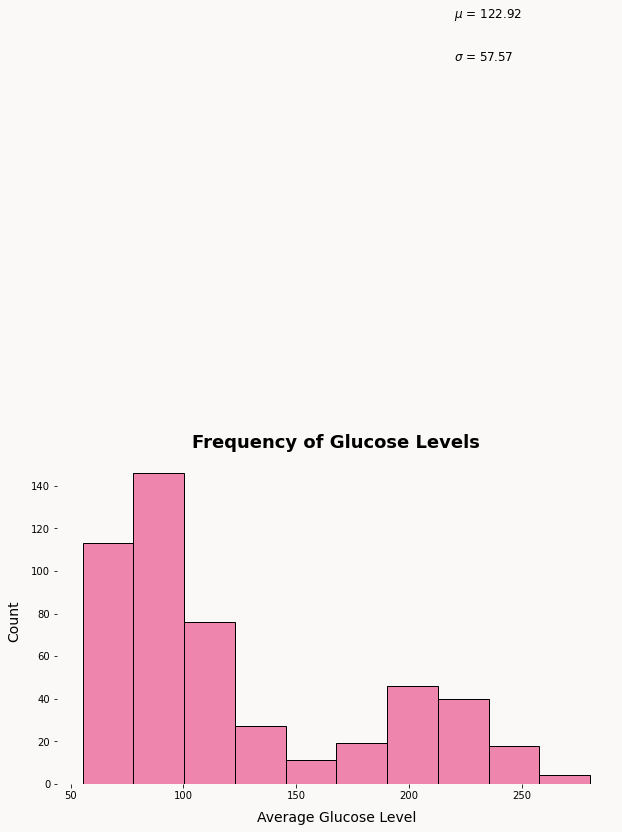

In [318]:
fig, ax = plt.subplots(figsize = (10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

sns.histplot(
    df['avg_glucose_level'],
    color = "#ea5f94",
    kde = False
)

for i in ['top', 'left', 'bottom', 'right']:
    ax.spines[i].set_visible(False)


plt.text(220, 360, r'$\mu$ = '+str(round(df['avg_glucose_level'].mean(), 2)), fontsize = 12)
plt.text(220, 340, r'$\sigma$ = '+str(round(df['avg_glucose_level'].std(), 2)), fontsize = 12)
plt.title('Frequency of Glucose Levels', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Average Glucose Level', fontsize = 14, labelpad = 10)
plt.ylabel('Count', fontsize = 14, labelpad = 10)

In [319]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,smokes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,smokes,1
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,smokes,1


C:\Users\stewi\AppData\Local\Temp\ipykernel_11472\1433969067.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


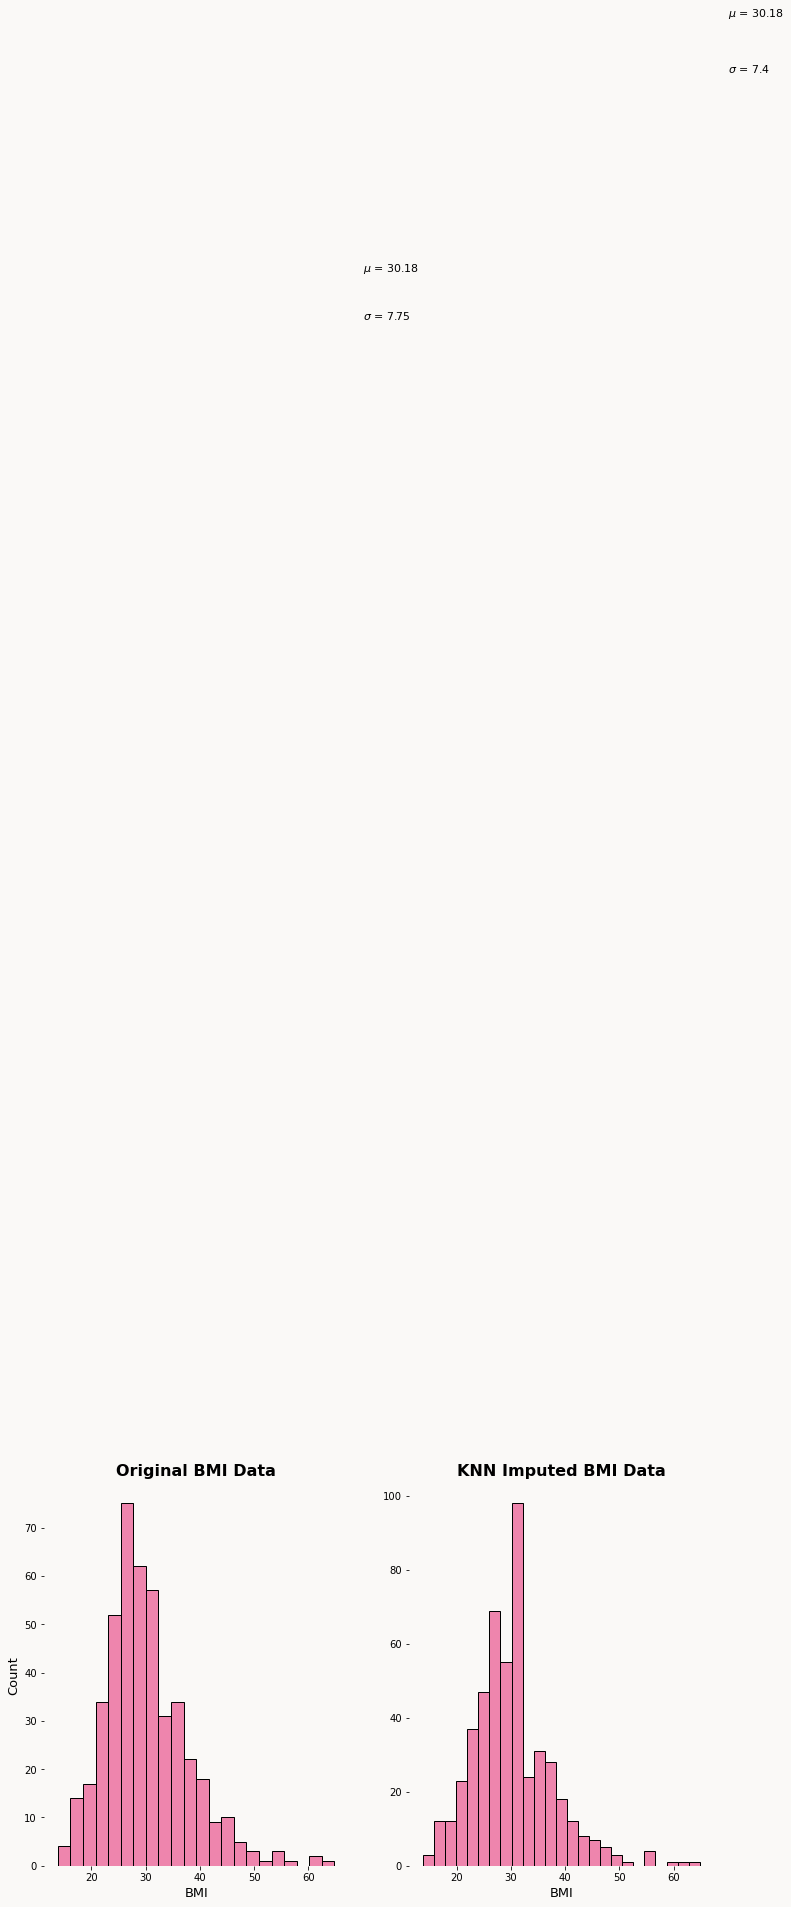

In [320]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))
fig.patch.set_facecolor('#faf9f7')
ax[0].set_facecolor('#faf9f7')
ax[1].set_facecolor('#faf9f7')

sns.histplot(
    df['bmi'],
    color = "#ea5f94",
    kde = False,
    ax = ax[0]
)

sns.histplot(
    df_knn['bmi'],
    color = "#ea5f94",
    kde = False,
    ax = ax[1]
)

ax[0].text(70, 330, r'$\mu$ = '+str(round(df['bmi'].mean(), 2)), fontsize = 11)
ax[0].text(70, 320, r'$\sigma$ = '+str(round(df['bmi'].std(), 2)), fontsize = 11)
ax[0].set_title('Original BMI Data', fontsize = 16, fontweight = 'bold', pad = 10)
ax[0].set_xlabel('BMI', fontsize = 13)
ax[0].set_ylabel('Count', fontsize = 13)

ax[1].text(70, 500, r'$\mu$ = '+str(round(df_knn['bmi'].mean(), 2)), fontsize = 11)
ax[1].text(70, 485, r'$\sigma$ = '+str(round(df_knn['bmi'].std(), 2)), fontsize = 11)
ax[1].set_title('KNN Imputed BMI Data', fontsize = 16, fontweight = 'bold', pad = 10)
ax[1].set_xlabel('BMI', fontsize = 13)
ax[1].set_ylabel('')

for i in ['top', 'left', 'bottom', 'right']:
    ax[0].spines[i].set_visible(False)
    ax[1].spines[i].set_visible(False)


plt.tight_layout()

In [321]:
df['bmi'] = df_knn['bmi']
df['bmi'].isnull().sum()

0

In [322]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.175604,smokes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,smokes,1
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,smokes,1


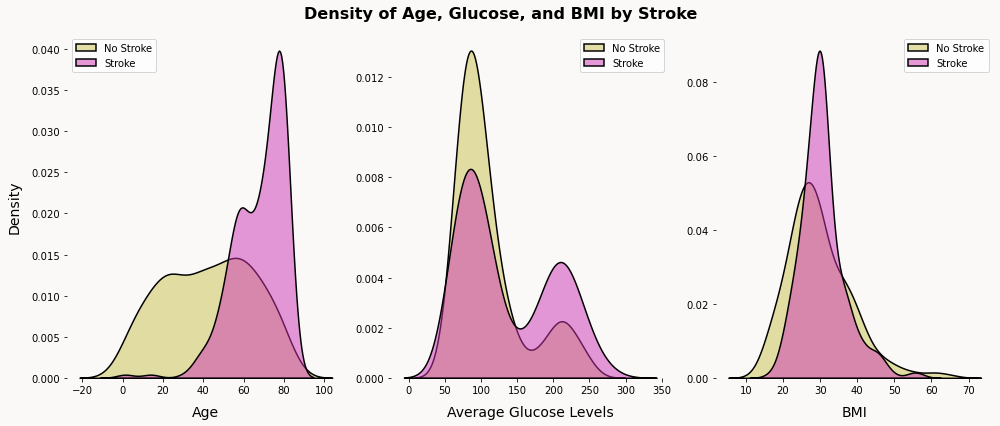

In [323]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14,6))
fig.patch.set_facecolor('#faf9f7')

for i in (ax1, ax2, ax3):
    i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['age'][df['stroke'] == 0],
    ax = ax1,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['age'][df['stroke'] == 1],
    ax = ax1,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)
ax1.legend(['No Stroke', 'Stroke'], loc = 'upper left')
ax1.set_xlabel('Age', fontsize = 14, labelpad = 10)
ax1.set_ylabel('Density', fontsize = 14, labelpad = 10)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 0],
    ax = ax2,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 1],
    ax = ax2,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax2.legend(['No Stroke', 'Stroke'])
ax2.set_xlabel('Average Glucose Levels', fontsize = 14, labelpad = 10)
ax2.set_ylabel('')

sns.kdeplot(
    df['bmi'][df['stroke'] == 0],
    ax = ax3,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke'] == 1],
    ax = ax3,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['No Stroke', 'Stroke'])
ax3.set_xlabel('BMI', fontsize = 14, labelpad = 10)
ax3.set_ylabel('')

plt.suptitle('Density of Age, Glucose, and BMI by Stroke', fontsize = 16, fontweight = 'bold')

for i in (ax1, ax2, ax3):
    for j in ['top', 'left', 'bottom', 'right']:
        i.spines[j].set_visible(False)

fig.tight_layout()


In [324]:
stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke'] == 0]

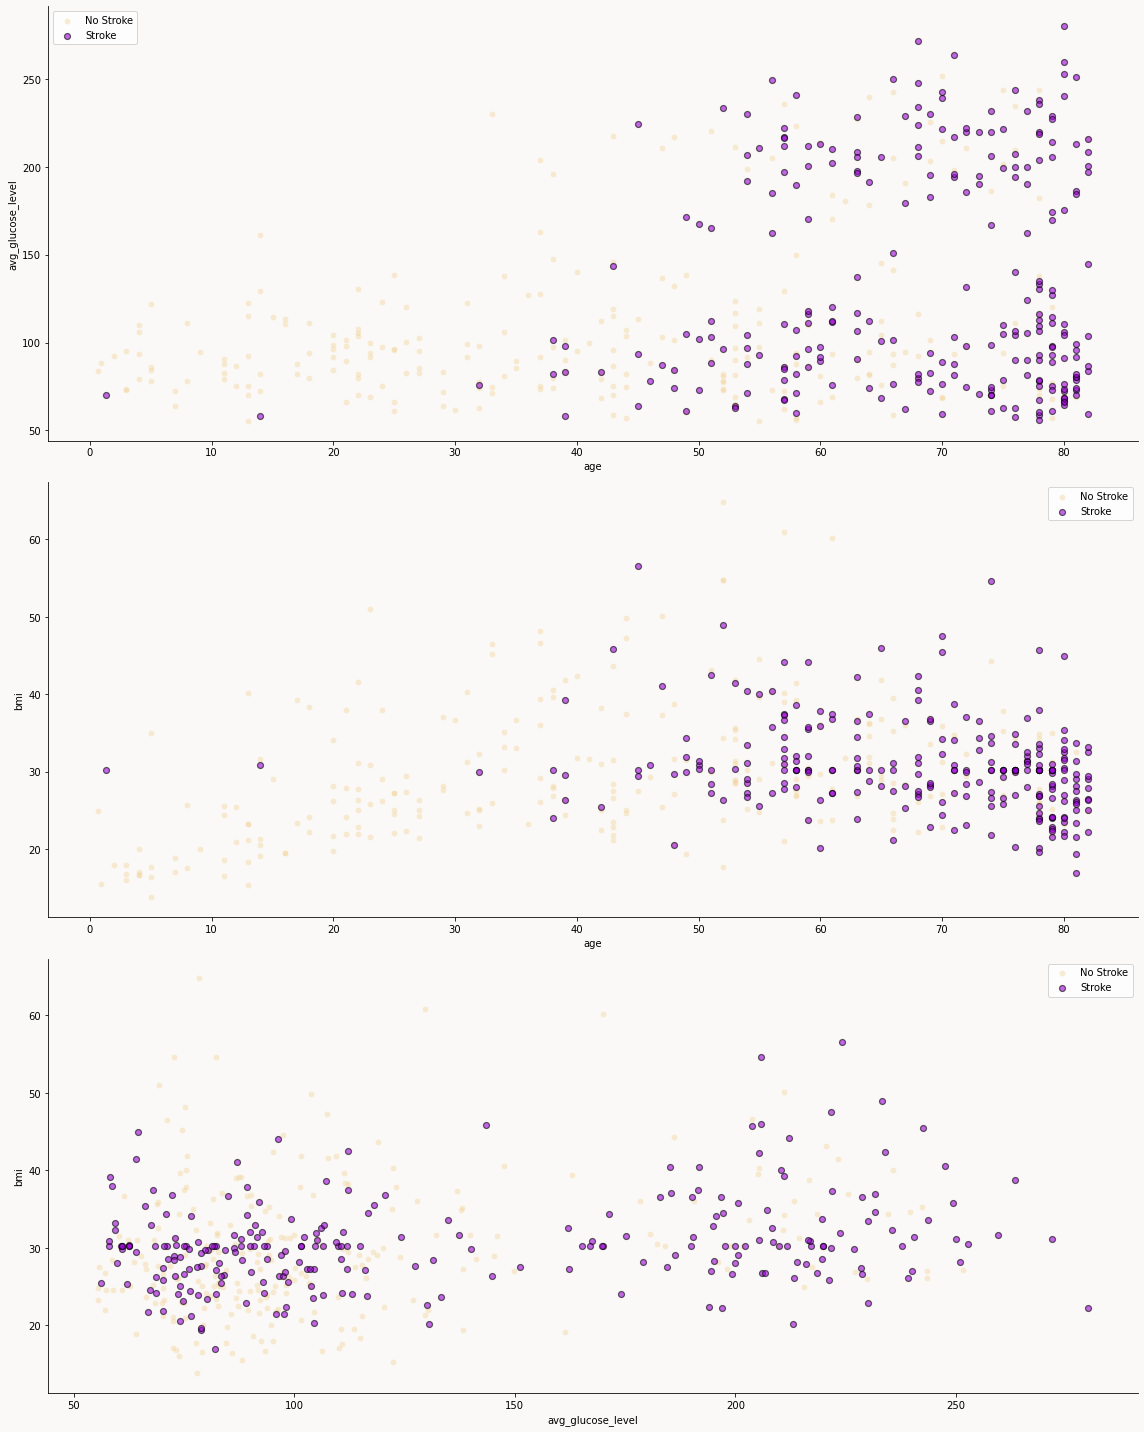

In [325]:
fig, ax = plt.subplots(3, 1, figsize=(16,20))
fig.patch.set_facecolor('#faf9f7')
for j in range(0, 3):
    ax[j].set_facecolor('#faf9f7')

## Age vs Glucose Levels
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'avg_glucose_level', color = '#f1d295',
    alpha = 0.4, ax = ax[0]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'avg_glucose_level', color = "#9d02d7",
    ax = ax[0], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Age vs BMI
sns.scatterplot(
    data = no_stroke, x = 'age', y = 'bmi', color = '#f1d295',
    alpha = 0.4, ax = ax[1]
)
sns.scatterplot(
    data = stroke, x = 'age', y = 'bmi', color = "#9d02d7",
    ax = ax[1], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)

# Glucose Levels vs BMI
sns.scatterplot(
    data = no_stroke, x = 'avg_glucose_level', y = 'bmi', color = '#f1d295',
    alpha = 0.4, ax = ax[2]
)
sns.scatterplot(
    data = stroke, x = 'avg_glucose_level', y = 'bmi', color = "#9d02d7",
    ax = ax[2], edgecolor = 'black', linewidth = 1.2, alpha = 0.6
)
    
sns.despine()

for i in range(0, 3, 1):
    ax[i].legend(['No Stroke', 'Stroke'])

fig.tight_layout()

Text(0.5, 1.0, 'Percentage of Strokes')

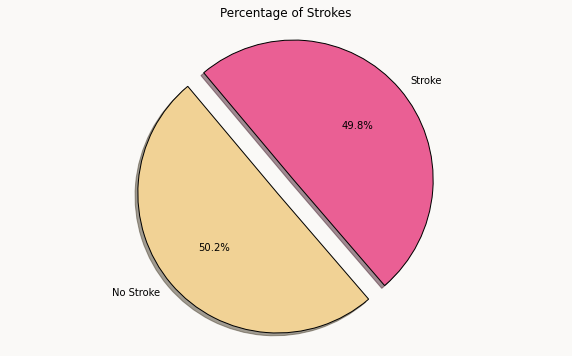

In [326]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

labels = ['No Stroke', 'Stroke']
colors = ["#f1d295", "#ea5f94"]
sizes = df['stroke'].value_counts()

plt.pie(sizes, explode = [0, 0.15], labels = labels, colors = colors,
           autopct = '%1.1f%%', shadow = True, startangle = 130,
           wedgeprops = {'ec': 'black'}, textprops = {'fontweight': 'medium'}
        
)

plt.axis('equal')
plt.title('Percentage of Strokes')

In [327]:
male_str = 0
fem_str = 0
male_nstr = 0
fem_nstr = 0

for index, row in df.iterrows():
    if row['gender'] == 'Male':
        if row['stroke'] == 1:
            male_str += 1
        else:
            male_nstr += 1
    else:
        if row['stroke'] == 1:
            fem_str += 1
        else:
            fem_nstr += 1

print(male_str, fem_str, male_nstr, fem_nstr)

108 143 93 156


Text(0.5, 50.0, 'Stroke')

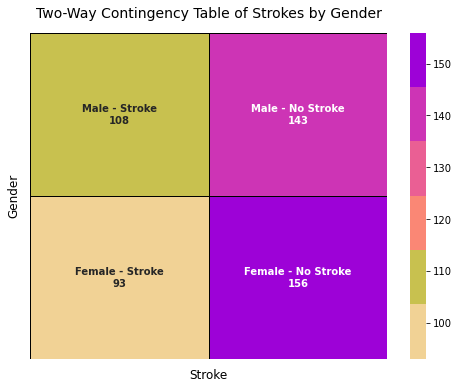

In [328]:
plt.subplots(figsize=(8,6))

stroke_matrix = np.array([[108, 143], [93,156]])
labels = np.array([['Male - Stroke', 'Male - No Stroke'], ['Female - Stroke', 'Female - No Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), stroke_matrix.flatten())])).reshape(2,2)


sns.heatmap(
    stroke_matrix,
    annot = formatted,
    fmt = '',
    cmap = palette,
    xticklabels = False,
    yticklabels = False,
    linecolor = 'black',
    linewidth = 1,
    annot_kws = {'fontweight': 'semibold'}
)
plt.title('Two-Way Contingency Table of Strokes by Gender', pad = 15, fontsize = 14)
plt.ylabel('Gender', fontsize = 12, labelpad = 10)
plt.xlabel('Stroke', fontsize = 12, labelpad = 10)

In [329]:
heart_cont = pd.crosstab(df['heart_disease'], df['stroke'])
heart_cont

stroke,0,1
heart_disease,,
0,238,187
1,11,64


Text(0.5, 50.0, 'Stroke')

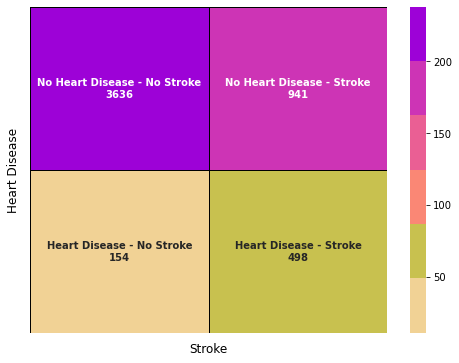

In [330]:
plt.subplots(figsize=(8,6))

heart_matrix = np.array([[3636, 941], [154, 498]])
labels = np.array([['No Heart Disease - No Stroke', 'No Heart Disease - Stroke'], ['Heart Disease - No Stroke', 'Heart Disease - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), heart_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    heart_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Heart Disease', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [331]:
stat, p, dof, expected = chi2_contingency(heart_cont)
stat, p

(41.92835712822386, 9.467955772615393e-11)

In [332]:
hyper_cont = pd.crosstab(df['hypertension'], df['stroke'])
hyper_cont

stroke,0,1
hypertension,,
0,224,175
1,25,76


Text(0.5, 50.0, 'Stroke')

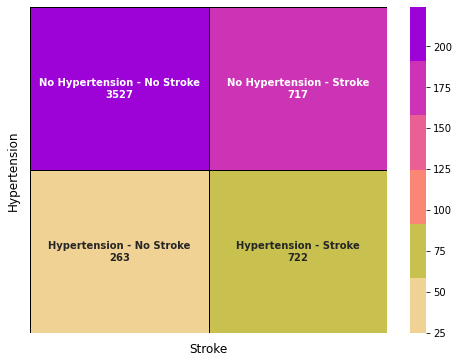

In [333]:
plt.subplots(figsize=(8,6))

hyper_matrix = np.array([[3527, 717], [263, 722]])
labels = np.array([['No Hypertension - No Stroke', 'No Hypertension - Stroke'], ['Hypertension - No Stroke', 'Hypertension - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), hyper_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    hyper_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Hypertension', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [334]:
df.groupby('Residence_type')['stroke'].value_counts()

Residence_type  stroke
Rural           0         138
                1         115
Urban           1         136
                0         111
Name: stroke, dtype: int64

In [335]:
res_cont = pd.crosstab(df['Residence_type'], df['stroke'])
res_cont

stroke,0,1
Residence_type,,
Rural,138,115
Urban,111,136


Text(0.5, 50.0, 'Stroke')

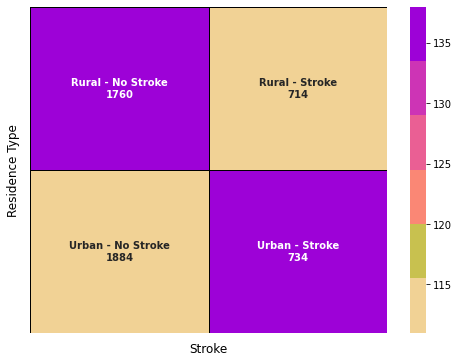

In [336]:
plt.subplots(figsize=(8,6))

res_matrix = np.array([[1760, 714], [1884, 734]])
labels = np.array([['Rural - No Stroke', 'Rural - Stroke'], ['Urban - No Stroke', 'Urban - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), res_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    res_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Residence Type', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [337]:
mar_cont = pd.crosstab(df['ever_married'], df['stroke'])
mar_cont

stroke,0,1
ever_married,,
No,85,29
Yes,164,222


In [338]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.175604,smokes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,smokes,1
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,smokes,1


Text(0.5, 50.0, 'Stroke')

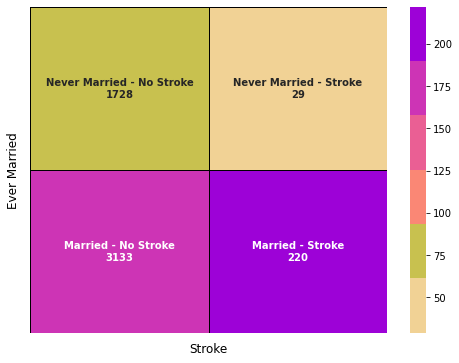

In [339]:
plt.subplots(figsize=(8,6))

mar_matrix = np.array([[1728, 29], [3133, 220]])
labels = np.array([['Never Married - No Stroke', 'Never Married - Stroke'], ['Married - No Stroke', 'Married - Stroke']])
formatted = (np.asarray(["{0}\n{1:.0f}".format(text, data) for text, data in zip(labels.flatten(), mar_matrix.flatten())])).reshape(2,2)

sns.heatmap(
    mar_cont,
    annot = formatted,
    fmt = '',
    cmap = palette,
    linewidth = 1,
    linecolor = 'black',
    xticklabels = False,
    yticklabels = False,
    annot_kws = {'fontweight': 'semibold'}
)
plt.ylabel('Ever Married', labelpad = 10, fontsize = 12)
plt.xlabel('Stroke', labelpad = 10, fontsize = 12)

In [340]:
df['smoking_status'].unique()

array(['formerly_smoked', 'smokes', 'never_smoked', 'Unknown'],
      dtype=object)

In [341]:
df.groupby('smoking_status')['stroke'].value_counts()

smoking_status   stroke
Unknown          0          71
                 1          26
formerly_smoked  1          68
                 0          39
never_smoked     0         107
                 1          61
smokes           1          96
                 0          32
Name: stroke, dtype: int64

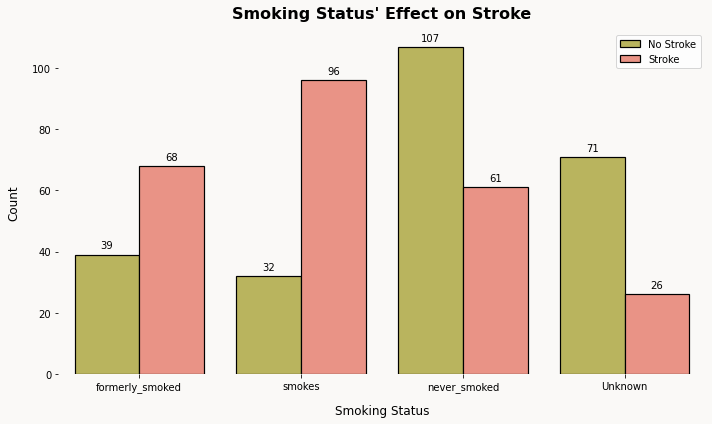

In [342]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

s = sns.countplot(
    data = df, x = 'smoking_status', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Smoking Status' Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Smoking Status', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in s.patches:
    s.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()

In [343]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

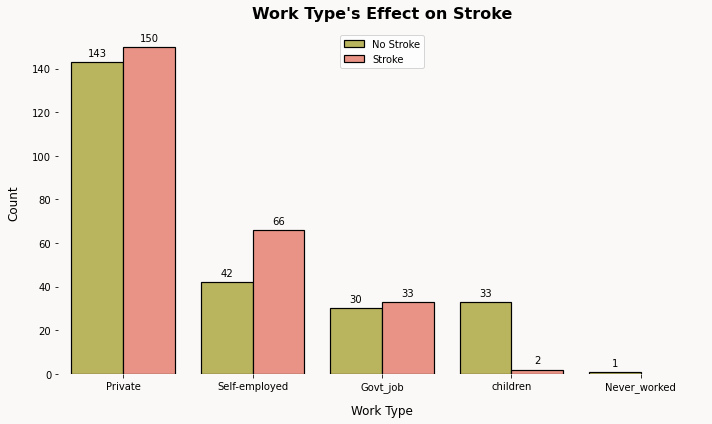

In [344]:
fig, ax = plt.subplots(figsize=(10,6))
fig.patch.set_facecolor('#faf9f7')
ax.set_facecolor('#faf9f7')

bar_pal = ["#c8c14f", "#fa8775"]

w = sns.countplot(
    data = df, x = 'work_type', hue = 'stroke', palette = bar_pal,
    linewidth = 1.2, ec = 'black'
)

for i in ['top', 'right', 'bottom', 'left']:
    ax.spines[i].set_visible(False)

plt.legend(['No Stroke', 'Stroke'])
plt.title("Work Type's Effect on Stroke", size = 16, weight = 'bold', pad = 12)
plt.xlabel('Work Type', size = 12, labelpad = 12)
plt.ylabel('Count', size = 12, labelpad = 12)

for i in w.patches:
    w.annotate(format(i.get_height(), '.0f'),  (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

fig.tight_layout()

In [345]:
gen_odds = (108 * 2854) / (141 * 2007)

heart_odds = (229 * 202) / (4632 * 47)

hyper_odds = (432 * 183) / (4429 * 66)

res_odds = (2400 * 135) / (2461 * 114)

mar_odds = (1728 * 220) / (3133 * 29)

d = {
    'Features': ['Gender', 'Heart Disease', 'Hypertension',
                'Residence', 'Married'],
    'Odds': [gen_odds, heart_odds, hyper_odds, res_odds, mar_odds]
}

odds_df = pd.DataFrame(data = d)
odds_df

,Features,Odds
0,Gender,1.089209
1,Heart Disease,0.212481
2,Hypertension,0.270449
3,Residence,1.154858
4,Married,4.184158


In [346]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly_smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.175604,smokes,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,smokes,1
3,60182,Female,49.0,1,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,smokes,1


In [347]:
df = pd.get_dummies(df, columns = ['gender', 'work_type', 'Residence_type', 'smoking_status'], prefix = ['sex', 'work', 'residence', 'smoke'])
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly_smoked,smoke_never_smoked,smoke_smokes
0,9046,67.0,0,1,Yes,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,Yes,202.21,30.175604,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,31112,80.0,0,1,Yes,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,60182,49.0,1,0,Yes,171.23,34.400000,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,Yes,174.12,24.000000,1,1,0,...,0,0,1,0,1,0,0,0,0,1


In [348]:
df['ever_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly_smoked,smoke_never_smoked,smoke_smokes
0,9046,67.0,0,1,1,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,1,202.21,30.175604,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,31112,80.0,0,1,1,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,60182,49.0,1,0,1,171.23,34.400000,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,1,174.12,24.000000,1,1,0,...,0,0,1,0,1,0,0,0,0,1


In [349]:
#num_cols = ['age', 'avg_glucose_level', 'bmi']

#scaler = StandardScaler()

#df[num_cols] = scaler.fit_transform(df[num_cols])
num_cols=df.select_dtypes(include=['object']).columns
print(num_cols)
# This code will fetech columns whose data type is object.
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
# Initializing our Label Encoder object
df[num_cols]=df[num_cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(df.head(10))

Index([], dtype='object')
      id   age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0   9046  67.0             0              1             1             228.69   
1  51676  61.0             0              0             1             202.21   
2  31112  80.0             0              1             1             105.92   
3  60182  49.0             1              0             1             171.23   
4   1665  79.0             1              0             1             174.12   
5  56669  81.0             0              1             1             186.21   
6  53882  74.0             1              1             1              70.09   
7  10434  69.0             1              0             0             230.00   
8  27419  59.0             0              1             1             170.00   
9  60491  78.0             1              0             1              58.57   

         bmi  stroke  sex_Female  sex_Male  ...  work_Never_worked  \
0  36.600000       1   

In [350]:
df.head()

,id,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,...,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly_smoked,smoke_never_smoked,smoke_smokes
0,9046,67.0,0,1,1,228.69,36.600000,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,1,202.21,30.175604,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,31112,80.0,0,1,1,105.92,32.500000,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,60182,49.0,1,0,1,171.23,34.400000,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,1,174.12,24.000000,1,1,0,...,0,0,1,0,1,0,0,0,0,1


In [351]:
df = df.drop('id', axis = 1)
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,sex_Female,sex_Male,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly_smoked,smoke_never_smoked,smoke_smokes
0,67.0,0,1,1,228.69,36.600000,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,1,202.21,30.175604,1,1,0,0,0,0,1,0,1,0,0,0,0,1
2,80.0,0,1,1,105.92,32.500000,1,0,1,0,0,1,0,0,1,0,0,0,0,1
3,49.0,1,0,1,171.23,34.400000,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,1,0,0,0,0,1,0,1,0,0,0,0,1


In [352]:
df.isnull().sum()

age                      0
hypertension             0
heart_disease            0
ever_married             0
avg_glucose_level        0
bmi                      0
stroke                   0
sex_Female               0
sex_Male                 0
work_Govt_job            0
work_Never_worked        0
work_Private             0
work_Self-employed       0
work_children            0
residence_Rural          0
residence_Urban          0
smoke_Unknown            0
smoke_formerly_smoked    0
smoke_never_smoked       0
smoke_smokes             0
dtype: int64

x = df.drop('stroke', axis = 1)
y = df['stroke']

#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=42)# fit predictor and target variable
#x_ros, y_ros = ros.fit_resample(x, y)
#smote = SMOTE()

#x_oversample, y_oversample = smote.fit_resample(x, y)


from imblearn.over_sampling import SMOTE

smote = SMOTE()

#fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print(y_smote.value_counts())


In [353]:
df.isnull().sum()

age                      0
hypertension             0
heart_disease            0
ever_married             0
avg_glucose_level        0
bmi                      0
stroke                   0
sex_Female               0
sex_Male                 0
work_Govt_job            0
work_Never_worked        0
work_Private             0
work_Self-employed       0
work_children            0
residence_Rural          0
residence_Urban          0
smoke_Unknown            0
smoke_formerly_smoked    0
smoke_never_smoked       0
smoke_smokes             0
dtype: int64

In [354]:
x = df.drop('stroke', axis = 1)
y = df['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [355]:
x.tail()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,sex_Female,sex_Male,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly_smoked,smoke_never_smoked,smoke_smokes
495,71.0,0,0,1,93.28,34.7,1,0,0,0,1,0,0,0,1,0,0,1,0
496,5.0,0,0,0,122.19,35.0,0,1,0,0,0,0,1,1,0,1,0,0,0
497,14.0,0,0,0,129.53,21.3,1,0,0,0,0,0,1,1,0,0,0,1,0
498,15.0,0,0,0,114.53,29.1,1,0,0,0,0,0,1,1,0,1,0,0,0
499,66.0,0,0,0,93.73,23.9,1,0,0,0,1,0,0,0,1,0,0,0,1


#from imblearn.over_sampling import SMOTE
#smote = SMOTE()
#x_smote, y_smote = smote.fit_resample(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cr_rf = classification_report(y_test, y_pred)
print(cr_rf)

In [356]:
#Randpm forest model
rf = RandomForestClassifier(bootstrap=True, criterion= 'entropy', max_depth= 20, random_state= 23)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
cr_rf = classification_report(y_test, y_pred_rf)
print(cr_rf)

#ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
#ranfor_model.fit(x_train, y_train)


# Predicting the test set results
#y_ranfor = ranfor_model.predict(x_test)
#y_ranfor_prob = ranfor_model.predict_proba(x_test)   
#print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69        51
           1       0.68      0.78      0.72        49

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



print('Precision Score: ', round(precision_score(y_test, y_ranfor_prob), 2))
print('Recall Score: ', round(recall_score(y_test, y_ranfor_prob), 2))
print('F1 Score: ', round(f1_score(y_test, y_ranfor_prob), 2))
print('Accuracy Score: ', round(accuracy_score(y_test, y_ranfor_prob), 2))
print('ROC AUC: ', round(roc_auc_score(y_test, y_ranfor_prob), 2))

C:\Users\stewi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


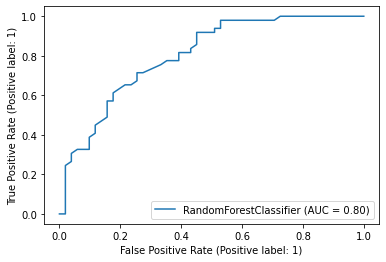

In [358]:
plot_roc_curve(rf, x_test, y_test)

<AxesSubplot:>

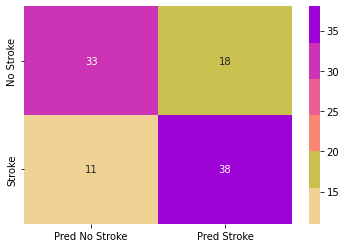

In [359]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    cmap = palette,
    annot = True,
    fmt = 'd',
    yticklabels = ['No Stroke', 'Stroke'],
    xticklabels = ['Pred No Stroke', 'Pred Stroke']
)

In [360]:
import pickle
with open(r'E:\MscIt proj\stroke\models\Stroke_analysis.pkl','wb')as file:
    pickle.dump(rf,file)


# pandas profiling
from pandas_profiling import ProfileReport
profile=ProfileReport(df)
profile.to_file(output_file= r"E:\MscIt proj\stroke\templates\stroke.html")

In [361]:
x.tail()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,sex_Female,sex_Male,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children,residence_Rural,residence_Urban,smoke_Unknown,smoke_formerly_smoked,smoke_never_smoked,smoke_smokes
495,71.0,0,0,1,93.28,34.7,1,0,0,0,1,0,0,0,1,0,0,1,0
496,5.0,0,0,0,122.19,35.0,0,1,0,0,0,0,1,1,0,1,0,0,0
497,14.0,0,0,0,129.53,21.3,1,0,0,0,0,0,1,1,0,0,0,1,0
498,15.0,0,0,0,114.53,29.1,1,0,0,0,0,0,1,1,0,1,0,0,0
499,66.0,0,0,0,93.73,23.9,1,0,0,0,1,0,0,0,1,0,0,0,1


In [364]:
#input_data = (67.0,0,1,1,228.69,36.600000,0,1,0,0,1,0,0,0,1,0,1,0,0) #stroke
input_data=(71.0,0,0,1,93.28,34.7,1,0,0,0,1,0,0,0,1,0,0,1,0) #NoStroke
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =rf.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
  print('The person doesnt have any chance of stroke')
else:
  print('The person have high chance of stroke')

[0]
The person doesnt have any chance of stroke


C:\Users\stewi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
loaded_model = pickle.load(open(r'E:\MscIt proj\stroke\models\Stroke_analysis.pkl', 'rb'))

In [ ]:
input_data = (67.0,0,1,1,228.69,36.600000,0,1,0,0,1,0,0,0,1,0,1,0,0) #stroke
#input_data=(71.0,0,0,1,93.28,34.7,1,0,0,0,1,0,0,0,1,0,0,1,0) #NoStroke
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction == 0):
  print('The person doesnt have any chance of stroke')
else:
  print('The person have high chance of stroke')

In [ ]:
from xgboost import XGBClassifier
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(x_train,y_train)
predict=xgc.predict(x_test)
print('Accuracy --> ',accuracy_score(predict,y_test))
print('F1 Score --> ',f1_score(predict,y_test))
print('Classification Report  --> \n',classification_report(predict,y_test))